In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from pylab import *
import seaborn as sns
import scipy.stats as stats

In [76]:
# Import data from csv files
lung_df = pd.read_csv(os.path.join("Output", "Cleaned_CDC_Data.csv"))
county_df = pd.read_csv(os.path.join("Output", "Cleaned_CDC_County_Data.csv"))
povertyDF = pd.read_csv(os.path.join('Output', 'medianstates.csv'))
povertyCountyDF = pd.read_csv(os.path.join("Resources", "Poverty%ByUSCounty.csv"))

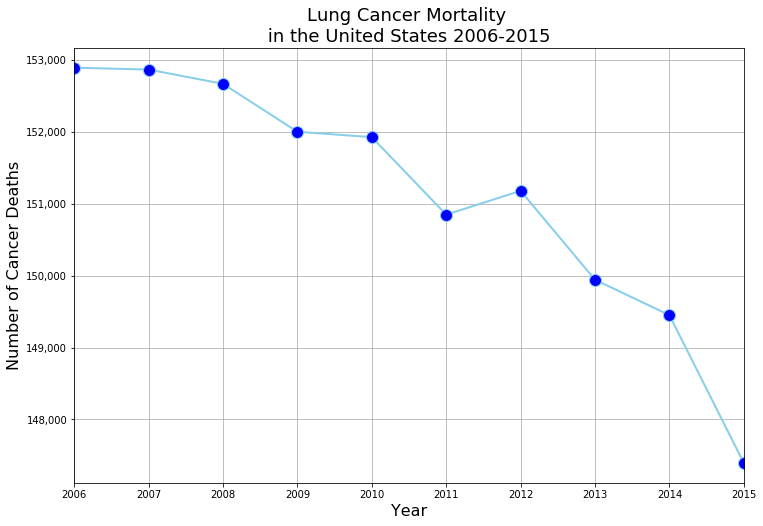

In [3]:
# Create a line graph of lung cancer mortality on a national level/nationwide over time from 2006-2015.

Group_By_Year_df = lung_df.groupby('Year')['Deaths'].sum().plot(x='year',y='Deaths'
                                                                   ,marker='o'                                                     
                                                                   ,markerfacecolor='blue'
                                                                   ,markersize=12
                                                                   ,color='skyblue'
                                                                   ,linewidth=2
                                                                   , figsize = (12,8))


Group_By_Year_df.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
#plt.figure(figsize =()) 
plt.title('Lung Cancer Mortality \n in the United States 2006-2015 ',fontsize = 18)
plt.xlabel('Year',fontsize = 16)
plt.ylabel('Number of Cancer Deaths',fontsize = 16)
plt.grid(True)
plt.show()


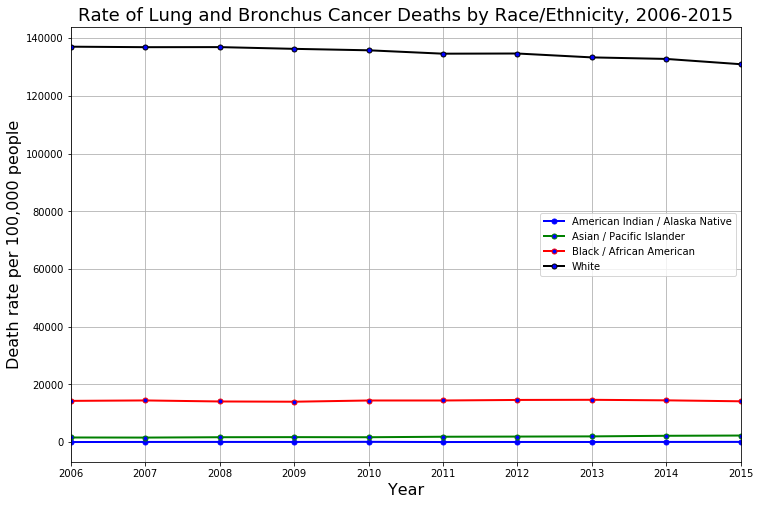

In [4]:
#Group data by Race
GroupBy_by_Race_df = lung_df.groupby('Race')

#Extract data into four seprate DataFrames based on race 
American_Indian_df = GroupBy_by_Race_df.get_group('American Indian or Alaska Native')
Asian_df = GroupBy_by_Race_df.get_group('Asian or Pacific Islander')                                              
African_American_df = GroupBy_by_Race_df.get_group('Black or African American')
White_df = GroupBy_by_Race_df.get_group('White')

plt.figure(figsize =(12,8))
American_Indian_df.groupby(['Year'])['Deaths'].sum().plot(x='Year',y='Deaths'
                                                                   ,marker='o'                                                     
                                                                   ,markerfacecolor='blue'
                                                                   ,markersize=5
                                                                   ,color='blue'
                                                                   ,linewidth=2) 

Asian_df.groupby(['Year'])['Deaths'].sum().plot(x='Year',y='Deaths'
                                                                   ,marker='o'                                                     
                                                                   ,markerfacecolor='blue'
                                                                   ,markersize=5
                                                                   ,color='green'
                                                                   ,linewidth=2)

African_American_df.groupby(['Year'])['Deaths'].sum().plot(x='Year',y='Deaths'
                                                                   ,marker='o'                                                     
                                                                   ,markerfacecolor='blue'
                                                                   ,markersize=5
                                                                   ,color='red'
                                                                   ,linewidth=2)

White_df.groupby(['Year'])['Deaths'].sum().plot(x='Year',y='Deaths'
                                                                   ,marker='o'                                                     
                                                                   ,markerfacecolor='blue'
                                                                   ,markersize=5
                                                                   ,color='black'
                                                                   ,linewidth=2)

plt.xlabel('Year',fontsize = 16)
plt.ylabel('Death rate per 100,000 people',fontsize = 16)
plt.title('Lung and Cancer Deaths by Race/Ethnicity, 2006-2015', fontsize = 18)
plt.grid(True)

plt.legend(('American Indian / Alaska Native', 'Asian / Pacific Islander', 'Black / African American','White'),
           loc='best')
plt.show()


<Figure size 576x432 with 0 Axes>

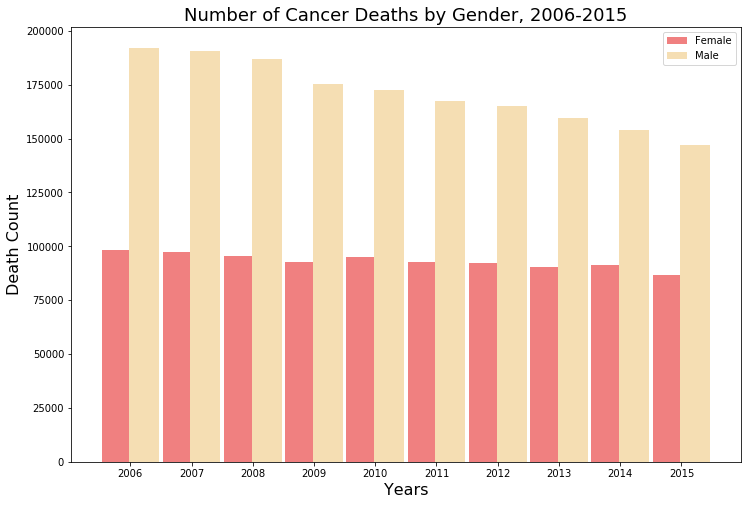

In [6]:
#Group data by gender
GroupBy_by_Gender_df = lung_df.groupby('Sex')

#Extract data into two seprate DataFrames based on gender
GroupBy_by_Female_df = GroupBy_by_Gender_df.get_group('Female')
GroupBy_by_Male_df = GroupBy_by_Gender_df.get_group('Male')  

#Group data by Year and Death per 100,000 people
Group_Fe_Yr_Dth=GroupBy_by_Female_df.groupby(['Year'])['Crude Rate'].sum()
Group_Ma_Yr_Dth=GroupBy_by_Male_df.groupby(['Year'])['Crude Rate'].sum()

#New Dictionary w/ year and corresponding male/female counts
dict={'femaleCount':Group_Fe_Yr_Dth,
      'maleCount'  :Group_Ma_Yr_Dth}
Fe_Ma_df =pd.DataFrame(dict)


plt.figure(figsize =(8,6))

#Positioning
barWidth = .45
r1 = np.arange(2006,2016,1)
r2 = [x + barWidth for x in r1]

fig = plt.figure(figsize =(12,8))
ax = fig.add_subplot(111)
ax.bar(r1, Group_Fe_Yr_Dth,width=0.49,color='lightcoral',align='center')
ax.bar(r2, Group_Ma_Yr_Dth,width=0.49,color='wheat',align='center')
#plt.grid()
ax.set_xlabel('Years',fontsize = 16)
ax.set_ylabel('Death Count',fontsize = 16)
plt.title('Number of Cancer Deaths by Gender, 2006-2015',fontsize = 18)
plt.legend(('Female', 'Male'),loc='upper right')
plt.xticks(r1+barWidth/2,range(2006,2016))
   
plt.show()


### Number of Cancer Deaths by Age Group, All Races, Both Sexes, 2006-2015

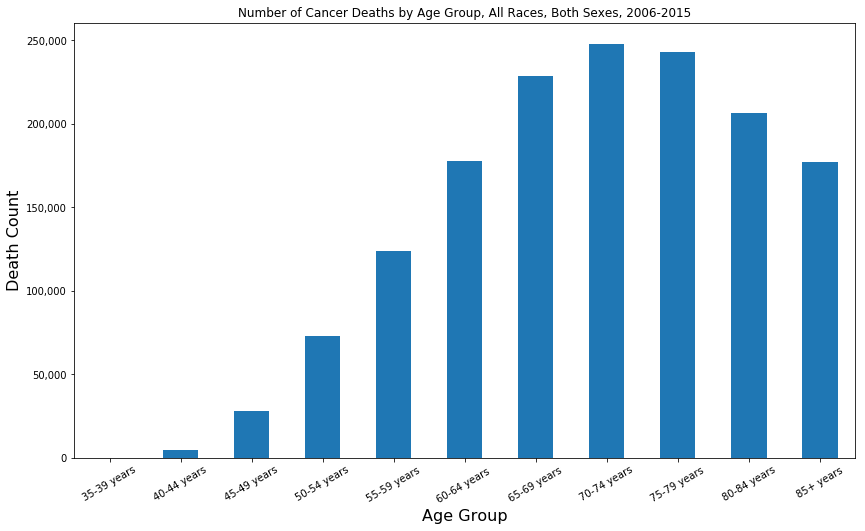

In [7]:
lung_df_02 = lung_df.copy()
# The death rate for age group below 35 is found to be ~ 0
# plot those records that have death rate > 0
lung_df_02=lung_df_02[lung_df_02['Deaths'] > 0].set_index('Age Group')

#Group data by Age and get the total number of deaths per age group
GroupBy_by_Age_df = lung_df_02.groupby('Age Group')['Deaths'].sum() 

#
plt.figure(figsize =(14,8))
Death_Count_Group_By_Age =GroupBy_by_Age_df.plot.bar(x='Age Group', y='Deaths', rot=30)
plt.xlabel('Age Group',fontsize = 16)  
plt.ylabel('Death Count',fontsize = 16)
plt.title('Number of Cancer Deaths by Age Group, All Races, Both Sexes, 2006-2015')
Death_Count_Group_By_Age.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.grid(False)


## Create Pie Chart of Cancer Mortality by Race

In [ ]:
# Create dataframe of lung cancer deaths by year and race
lung_race_df = lung_df.groupby(["Year", "Race"])["Deaths"].sum().unstack()

# Create dataframe of population by year and race
pop_race_df = lung_df.groupby(["Year", "Race"])["Population"].sum().unstack()

#Set values for each section of the pie charts
lung_race_perc = lung_race_df.loc[2015]/lung_race_df.loc[2015].sum()
pop_race_perc = pop_race_df.loc[2015].tolist()/pop_race_df.loc[2015].sum()

# Create pie charts

explode = [0.6, 0.4, 0.2, 0]
races = list(lung_race_df)
colors = ["lightgreen", "orange", "lightcoral", "lightskyblue"]

fig, [ax1,ax2] = plt.subplots(1, 2, figsize = (16, 8))
ax1.set_title("Total Population in 2015", fontsize = 18)
ax2.set_title("Lung Deaths in 2015", fontsize = 18)


patches1, texts1, autotexts1 = ax1.pie(pop_race_perc, labels = races, colors = colors, explode = explode, 
                                       autopct="%1.1f%%",shadow=True, startangle = 120, pctdistance=1.2, 
                                       labeldistance=1.35)

patches2, texts2, autotexts2 = ax2.pie(lung_race_perc, labels = races, colors = colors, explode = explode, 
                                       autopct="%1.1f%%",shadow=True, startangle = 120, pctdistance=1.2, 
                                       labeldistance=1.35)

for text in texts1:
    text.set_fontsize(14)
for autotext in autotexts1:
    autotext.set_fontsize(11)
for text in texts2:
    text.set_fontsize(14)
for autotext in autotexts2:
    autotext.set_fontsize(11)

ax1.axis("equal")
ax2.axis("equal")
plt.tight_layout()
plt.savefig(os.path.join("Output", "Pie_Chart_2015_Cancer.png"))
plt.show()


## Create a scatter plot of lung cancer mortality vs. poverty

In [10]:
# Create dataframe of lung cancer deaths by year and state
lung_state_df = lung_df.groupby(["Year", "State"])["Deaths"].sum().unstack()

# Create dataframe of population by year and state
pop_state_df = lung_df.groupby(["Year", "State"])["Population"].sum().unstack()

#Set values for each section of the pie charts
crudeRateDF = lung_state_df.loc[2015]*100000/pop_state_df.loc[2015]
#crudeRateDF = crudeRateDF.rename(columns={'Deaths': '2015 Crude Rate'})
crudeRateDF.replace(to_replace='District of Columbia', value='Washington D.C.')
crudeRateDF.head()

# Mike has a sort here, sort by 2015 Crude Rate, but I don't know why
# I think the rename thing is obsolete since it's not a df, but a series. We can make it a df if necessary

State
Alabama       73.103873
Alaska        14.208282
Arizona       48.576358
Arkansas      84.033865
California    45.419269
Name: 2015, dtype: float64

In [13]:
povertyDF.head()

,Full State Name,2012,2013,2014,2015,2016,2017
0,Alabama,19.8,20.90,20.5,20.2,20.30,19.30
1,Alaska,10.5,10.25,10.2,11.1,10.35,10.40
2,Arizona,20.2,19.40,19.9,19.8,20.50,19.70
3,Arkansas,20.4,21.50,21.1,21.0,20.60,19.80
4,California,15.5,16.65,16.7,16.6,16.25,15.25


In [16]:
pov2015df = povertyDF[['Full State Name', '2015']]
pov2015df = pov2015df.rename(columns = {'Full State Name':'State', '2015': '2015 Poverty Rate'})
pov2015df = pov2015df.set_index('State')
#pov2015df = pov2015df.sort_values(by='2015 Poverty Rate')
pov2015df.head()

# Not sure sort is necessary here

,2015 Poverty Rate
State,
Connecticut,9.45
Maryland,9.85
Rhode Island,9.90
North Dakota,10.00
New Hampshire,10.10


In [27]:
deathPovertyRateDF = pd.merge(pov2015df, crudeRateDF, on='State', how='inner')
deathPovertyRateDF = deathPovertyRateDF.rename(columns = {2015:'2015 Crude Rate'})
deathPovertyRateDF = deathPovertyRateDF.sort_values(by='2015 Crude Rate')
deathPovertyRateDF.head()

## PROBLEM WITH MERGE!!! MISSING 1 STATE!!!

,2015 Poverty Rate,2015 Crude Rate
State,,
Alaska,11.10,14.208282
Utah,13.00,17.259040
Wyoming,10.70,28.824251
Colorado,13.75,34.308564
New Mexico,21.00,39.402688


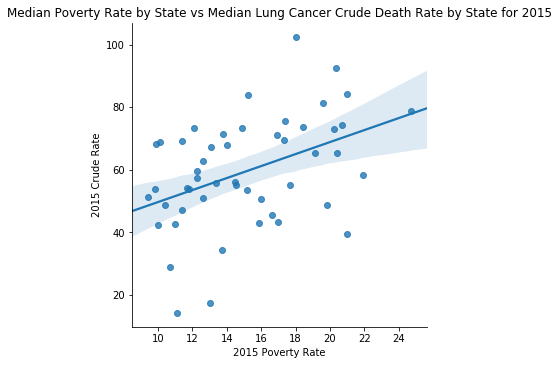

In [33]:
sns.lmplot(x='2015 Poverty Rate',y='2015 Crude Rate',data=deathPovertyRateDF, fit_reg=True)
plt.title('Median Poverty Rate by State vs Median Lung Cancer Crude Death Rate by State for 2015')
plt.savefig(os.path.join("Output", "povRatevsCrudeRate-State-Scatter.png"))

## WARNING returned
## TWEAK DATA TO BE BETTER VISUALIZED

In [71]:
cancer_county_2015_df = county_df.loc[county_df["Year"]==2015, :]
cancer_county_2015_df = cancer_county_2015_df[["County", "Crude Rate"]]
cancer_county_2015_df = cancer_county_2015_df.rename(columns = {"Crude Rate":"2015 Crude Rate"})
cancer_county_2015_df = cancer_county_2015_df.sort_values(by = "County")
cancer_county_2015_df.head()

,County,2015 Crude Rate
3,"Acadia Parish, LA",83.1
14,"Accomack County, VA",72.8
18,"Ada County, ID",32.9
25,"Adams County, CO",26.9
32,"Adams County, IL",58.2


In [77]:
## NEED TO GO BACK AND CLEAN THIS DATA IN THE CLEANING DATAFRAME TO GET RID OF DUPLICATES OR OTHERWISE FIGURE OUT WHERE THEY COME FROM


#povertyCountyDF = povertyCountyDF[["County", "2015"]]
#povertyCountyDF = povertyCountyDF.rename(columns = {"2015":"2015 Poverty Rate"})
povertyCountyDF = povertyCountyDF.sort_values(by = "County")
povertyCountyDF.head()

,County,State,2012,2013,2014,2015,2016,2017
4678,"Abbeville County, SC",SC,20.8,21.6,23.1,22.5,21.6,22.7
4632,"Abbeville County, SC",SC,20.8,21.6,23.1,22.5,21.6,22.7
2226,"Acadia Parish, LA",LA,19.1,18.7,19.9,20.6,20.6,21.5
2290,"Acadia Parish, LA",LA,19.1,18.7,19.9,20.6,20.6,21.5
5612,"Accomack County, VA",VA,20.2,20.5,20.5,19.6,19.5,19.8


In [65]:
deathPovertyRateCountyDF = pd.merge(povertyCountyDF, cancer_county_2015_df, how='inner')
deathPovertyRateCountyDF.head()

,County,2015 Poverty Rate,2015 Crude Rate
0,"Fairbanks North Star Borough, AK",8.1,32.1
1,"Fairbanks North Star Borough, AK",8.1,32.1
2,"Kenai Peninsula Borough, AK",10.0,58.6
3,"Kenai Peninsula Borough, AK",10.0,58.6
4,"Matanuska-Susitna Borough, AK",10.0,41.5


In [ ]:
## GRETEL LEFT OFF HERE IN THE DATA CONSOLIDATION PROCESS

Text(0.5, 1.0, 'Median Poverty Rate by State vs Median Lung Cancer Crude Death Rate by Count for 2015')

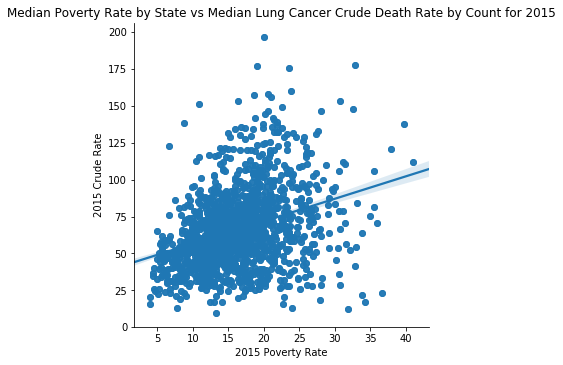

In [68]:
sns.lmplot(x='2015 Poverty Rate',y='2015 Crude Rate',data=deathPovertyRateCountyDF, fit_reg=True)
plt.savefig(os.path.join("Output", "povRatevsCrudeRate-County-Scatter.png"))
plt.title('Median Poverty Rate by State vs Median Lung Cancer Crude Death Rate by Count for 2015')